In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import seaborn as sns
from auto_fe import *

### A demo for Iris dataset

load data

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(data['data']), data['target'], random_state=42)
X_train.columns, X_test.columns = X_train.columns.astype(str), X_test.columns.astype(str)
X_train.shape, X_test.shape

((112, 4), (38, 4))

build classifier on the original data

In [3]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1, random_state=0)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
score = sum(pred==y_test)/len(y_test)
print("The acuuracy of the initial model is:", score)

The acuuracy of the initial model is: 0.9736842105263158


let's do authomatic arithmetic feature engineering to the data

In [4]:
X_train_fe, config = get_df_after_arithmetic_fe(X_train, model=forest)

In [5]:
X_train_fe

,0,1,2,3,2_quantile,3_quantile,2^2,3^2,2*3,2/3
4,5.0,3.6,1.4,0.2,0,0,1.96,0.04,0.28,7.000000
32,5.2,4.1,1.5,0.1,1,0,2.25,0.01,0.15,15.000000
142,5.8,2.7,5.1,1.9,3,3,26.01,3.61,9.69,2.684211
85,6.0,3.4,4.5,1.6,2,2,20.25,2.56,7.20,2.812500
86,6.7,3.1,4.7,1.5,2,2,22.09,2.25,7.05,3.133333
...,...,...,...,...,...,...,...,...,...,...
71,6.1,2.8,4.0,1.3,2,2,16.00,1.69,5.20,3.076923
106,4.9,2.5,4.5,1.7,2,2,20.25,2.89,7.65,2.647059
14,5.8,4.0,1.2,0.2,0,0,1.44,0.04,0.24,6.000000
92,5.8,2.6,4.0,1.2,2,2,16.00,1.44,4.80,3.333333


let's see the configuration object that will help us to do feature engineering also to the test set

In [6]:
config

{'quantile': Int64Index([2, 3], dtype='int64'),
 'polynomial': Int64Index([2, 3], dtype='int64'),
 'interact': [(2, 3)],
 'divide': [(2, 3)]}

we train the model according the new df

In [7]:
forest.fit(X_train_fe, y_train)

RandomForestClassifier(n_estimators=1, random_state=0)

now, we do the same arithmetic feature engineering we did to the train on the test set and predict

In [8]:
X_test_fe, _ = get_df_after_arithmetic_fe(X_test, config=config)
X_test_fe

,0,1,2,3,2_quantile,3_quantile,2^2,3^2,2*3,2/3
73,6.1,2.8,4.7,1.2,2,2,22.09,1.44,5.64,3.916667
18,5.7,3.8,1.7,0.3,2,1,2.89,0.09,0.51,5.666667
118,7.7,2.6,6.9,2.3,4,4,47.61,5.29,15.87,3.000000
78,6.0,2.9,4.5,1.5,2,2,20.25,2.25,6.75,3.000000
76,6.8,2.8,4.8,1.4,2,2,23.04,1.96,6.72,3.428571
31,5.4,3.4,1.5,0.4,1,2,2.25,0.16,0.60,3.750000
64,5.6,2.9,3.6,1.3,2,2,12.96,1.69,4.68,2.769231
141,6.9,3.1,5.1,2.3,3,4,26.01,5.29,11.73,2.217391
68,6.2,2.2,4.5,1.5,2,2,20.25,2.25,6.75,3.000000
82,5.8,2.7,3.9,1.2,2,2,15.21,1.44,4.68,3.250000


In [9]:
pred_fe = forest.predict(X_test_fe)
print("The accuracy of the model after arithmetic fe is:", sum(pred_fe==y_test)/len(y_test))

The accuracy of the model after arithmetic fe is: 1.0


even though the initial model got 97% accuracy, we succeed raise the accuracy to 100%

### let's try it on another dataset

In [10]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

datasets_list = [datasets.load_iris(), datasets.load_breast_cancer(), datasets.load_wine(), fetch_openml(name='diabetes', version=1)]

# CHOOSE DATASET NUMBER
DATA_SET_NUMBER = 3

In [11]:
dataset = datasets_list[DATA_SET_NUMBER]
X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(dataset['data']), dataset['target'], random_state=42)
X_train.columns, X_test.columns = X_train.columns.astype(str), X_test.columns.astype(str)
X_train.shape, X_test.shape

((576, 8), (192, 8))

In [12]:
# uncomment the next line if you want to look at the data
# dataset

In [13]:
from sklearn.ensemble import RandomForestClassifier

# train model
forest = RandomForestClassifier(n_estimators=1, random_state=0)
forest.fit(X_train, y_train)
pred = forest.predict(X_test)
score = sum(pred==y_test)/len(y_test)
print("The acuuracy of the initial model is:", score)

The acuuracy of the initial model is: 0.640625


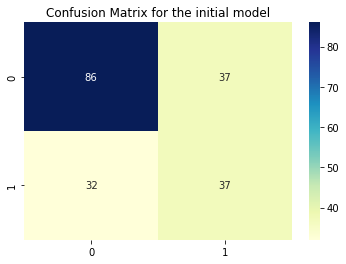

In [14]:
# confusion matrix for the initial model:
cm_arr = confusion_matrix(y_test, pred)
sns.heatmap(cm_arr, cmap='YlGnBu', annot=True, fmt="d").set_title('Confusion Matrix for the initial model')
plt.show()

In [15]:
# test model
X_train_fe, config = get_df_after_arithmetic_fe(X_train, model=forest)
forest.fit(X_train_fe, y_train)
X_test_fe, _ = get_df_after_arithmetic_fe(X_test, config=config)
pred_fe = forest.predict(X_test_fe)
print("The accuracy of the model after arithmetic fe is:", sum(pred_fe==y_test)/len(y_test))

The accuracy of the model after arithmetic fe is: 0.7135416666666666


Text(0.5, 1.0, 'Confusion Matrix for the better model')

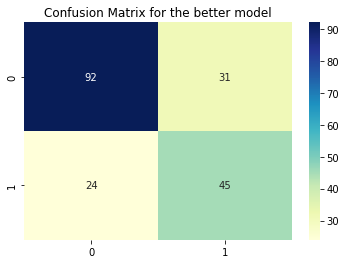

In [16]:
# confusion matrix for the better model:
cm_arr = confusion_matrix(y_test, pred_fe)
sns.heatmap(cm_arr, cmap='YlGnBu', annot=True, fmt="d").set_title('Confusion Matrix for the better model')
plt.show()